# Clone Paddle Repo

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

# If first time implement, run these block below


## Import test/train data from IC15:
* Data consists of 2 annotation files and 2 folders of test and train images. Each annotation and folder are for test and train.

* You can obtain img data from this link:
https://rrc.cvc.uab.es/?ch=4&com=downloads
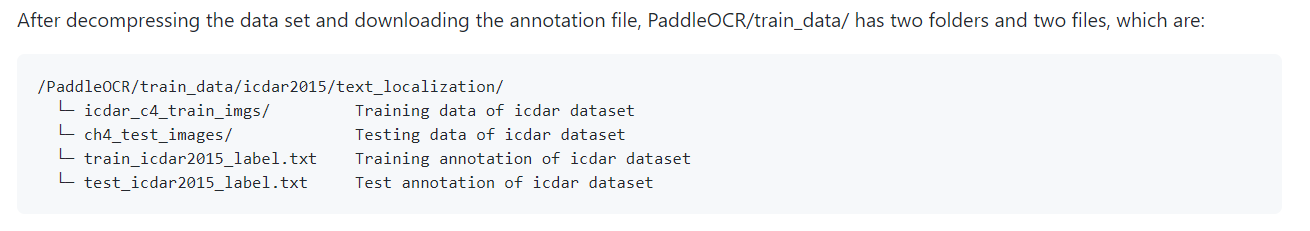

## Get pretrained_model: ResNet50 and MobileNetV3

In [ ]:
!cd PaddleOCR/
!wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/train_icdar2015_label.txt
!wget -P ./train_data/ https://paddleocr.bj.bcebos.com/dataset/test_icdar2015_label.txt
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_vd_ssld_pretrained.pdparams
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams

Instal requirements for PaddleOCR

In [ ]:
!cd PaddleOCR/
!pip install -r /content/PaddleOCR/requirements.txt

In [ ]:
!pip install paddlepaddle

In [ ]:
!pip install "paddleocr>=2.0.6"

In [ ]:
!pip install paddlepaddle-gpu

In [ ]:
!mv '/content/pretrain_models' '/content/PaddleOCR'
%cd '/content/PaddleOCR'
!mkdir 'train_data'

/content/PaddleOCR


You should put your data into /train_data

## NOTE:
> You will have to code your own annotation format for model. The format is:
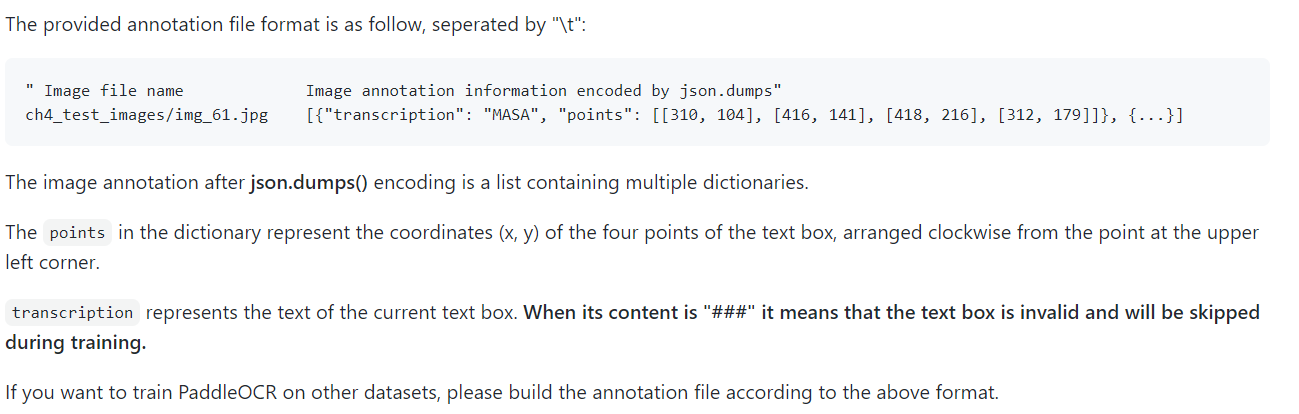

# Config model
> Open /content/PaddleOCR/configs/det/det_mv3_east.yml to adjust parameters for EAST model

> If you want to continue training, add your model path to 'checkpoints'

>> Epoch default: 10000

>> New epoch = old epoch + 1

> In the config file, *data_dir* in **Train** global is /train_data

> label_file_list is your train_annotation file.

> Same goes for **Test** global in the config file.

# Train data with EAST algorithms, using pretrained_model MobileNetV3 (or ResNet50)

In [ ]:
 !python /content/PaddleOCR/tools/train.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml

# Evaluate model MobileNetV3:


In [ ]:
 !python /content/PaddleOCR/tools/eval.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.checkpoints="/content/output/east_mv3/latest"

# Test predicting with a new image:

> The result image is located under /content/output/det_east/det_results

> The result annotation file is located under /content/output/det_east/predicts_east.txt

> Remember to convert result annotation file to suitable submission format.

> Predict on a folder: 
```
 !python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"
 ```

In [ ]:
 !python /content/PaddleOCR/tools/infer_det.py -c /content/PaddleOCR/configs/det/det_mv3_east.yml -o Global.infer_img="/content/public_test" Global.pretrained_model="/content/output/east_mv3/latest"

# Submit

In [ ]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='6a9753e1551cbdcefe0ca601843b4ccc3aeefec4f0e5d7ee456a64031198b5439930be564238bb0debc8376f6553e33d9c6c11dca10531ca80edc9211ef00f5c'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
        
submit_prediction(df_submission, sep=',', index=True, comment='my submission')

# References:
https://github.com/PaddlePaddle/PaddleOCR

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.1/doc/doc_en/detection_en.md